### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn으로 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])
    
    plt.tight_layout()
    plt.show()

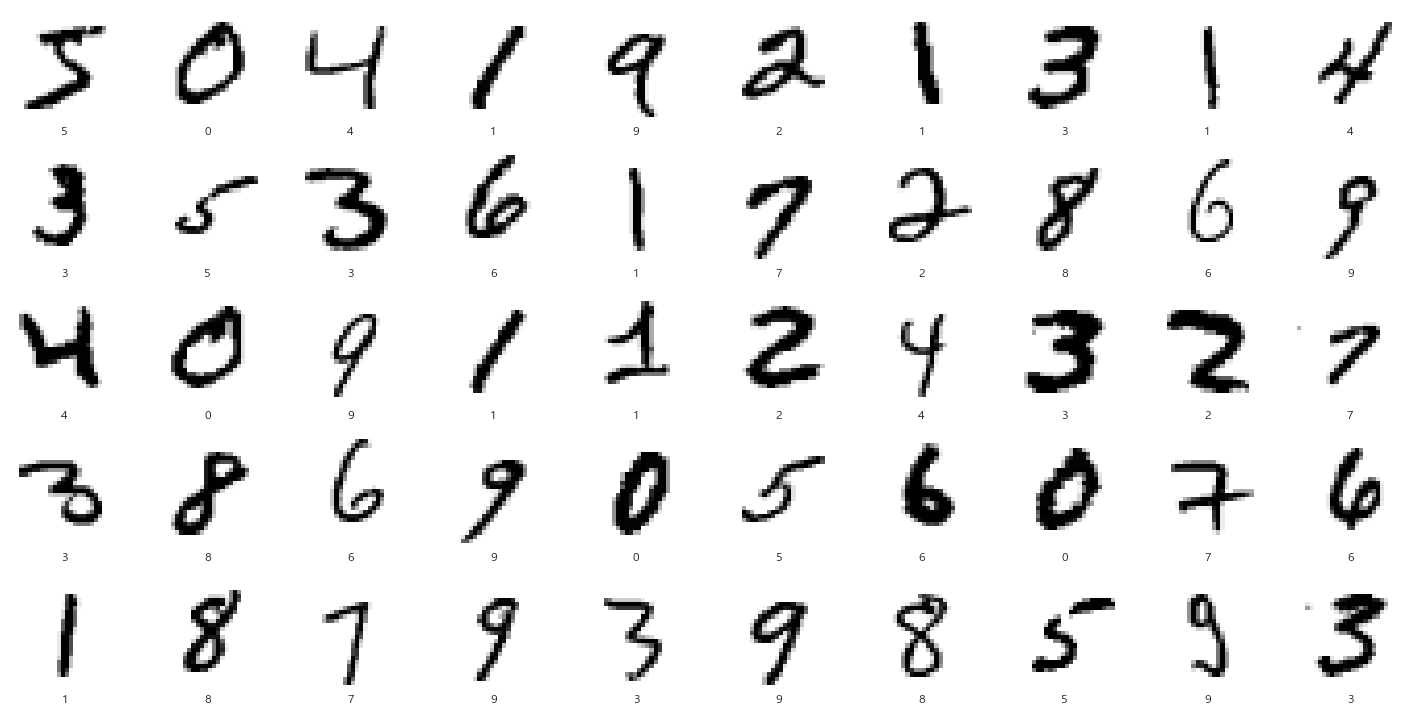

In [7]:
show_images(train_input, train_target, 5, 10)

In [8]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [9]:
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 1000)              785000    
                                                                 
 output (Dense)              (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 255.0 나눠서 0~1로 값 축소하는 일은 안함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
598/600 [============================>.] - ETA: 0s - loss: 0.6357 - accuracy: 0.9559
Epoch 1: val_loss improved from inf to 0.60801, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 0.6347 - accuracy: 0.9560 - val_loss: 0.6080 - val_accuracy: 0.9513
Epoch 2/20
596/600 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9702
Epoch 2: val_loss improved from 0.60801 to 0.44445, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 4s 6ms/step - loss: 0.2412 - accuracy: 0.9702 - val_loss: 0.4445 - val_accuracy: 0.9599
Epoch 3/20
594/600 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.9710
Epoch 3: val_loss did not improve from 0.44445
600/600 [==============================] - 4s 6ms/step - loss: 0.2379 - accuracy: 0.9710 - val_loss: 0.5674 - val_accuracy: 0.9484
Epoch 4/20
598/600 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0

In [22]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [23]:
# 255.0 나눠서 0~1로 값 축소하는 일은 안함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 4.2785 - accuracy: 0.8985
Epoch 1: val_loss improved from inf to 0.48744, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 4.2785 - accuracy: 0.8985 - val_loss: 0.4874 - val_accuracy: 0.9446
Epoch 2/20
594/600 [============================>.] - ETA: 0s - loss: 0.4474 - accuracy: 0.9324
Epoch 2: val_loss improved from 0.48744 to 0.29971, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 4s 7ms/step - loss: 0.4472 - accuracy: 0.9324 - val_loss: 0.2997 - val_accuracy: 0.9529
Epoch 3/20
598/600 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.9422
Epoch 3: val_loss improved from 0.29971 to 0.27088, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 4s 7ms/step - loss: 0.2912 - accuracy: 0.9422 - val_loss: 0.2709 - val_accuracy: 0.9541
Epoch 4/20
595/600 [========================

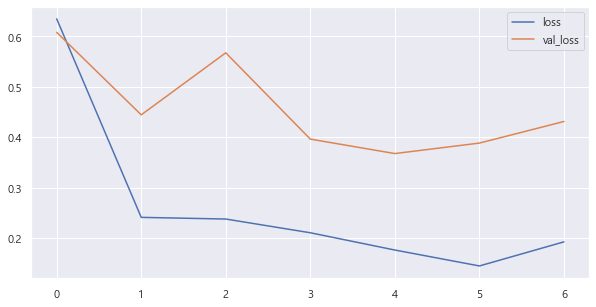

In [13]:
plot_target = ['loss','val_loss']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.show()

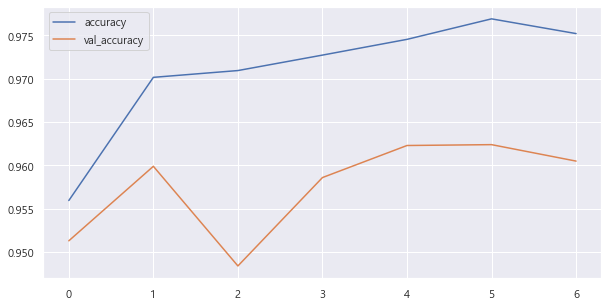

In [14]:
plot_target = ['accuracy','val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.show()

In [15]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.9623


[0.36770424246788025, 0.9623000025749207]

In [16]:
pred_result = model.predict(test_input)

313/313 [==============================] - 1s 2ms/step


In [17]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_result[:10]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.10153306e-22],
       [0.00000000e+00, 3.53213366e-22, 1.00000000e+00, 1.47120040e-21,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.12127174e-23, 0.00000000e+00,
        2.23984091e-21, 0.00000000e+00, 1.38485202e-35, 7.49673117e-19,
        1.66836556e-23, 3.58128624e-31],
       [1.00000000e+00, 0.00000000e+00, 1.35386575e-21, 1.30781728e-31,
        1.13676825e-22, 1.68926376e-21, 1.59979963e-09, 4.63338406e-14,
        4.33204413e-19, 6.22436272e-17],
       [1.18202341e-32, 0.00000000e+00, 2.09709432e-34, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.40331244e-26,
        0.00000000e+00, 5.87232515e-18],
       [8.85941426e-37, 1.00000000e+00, 1.45304905e-24, 1.47983886e-38,
   

In [18]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

377

In [19]:
import random

samples = random.choices(population=wrong_result, k=16)

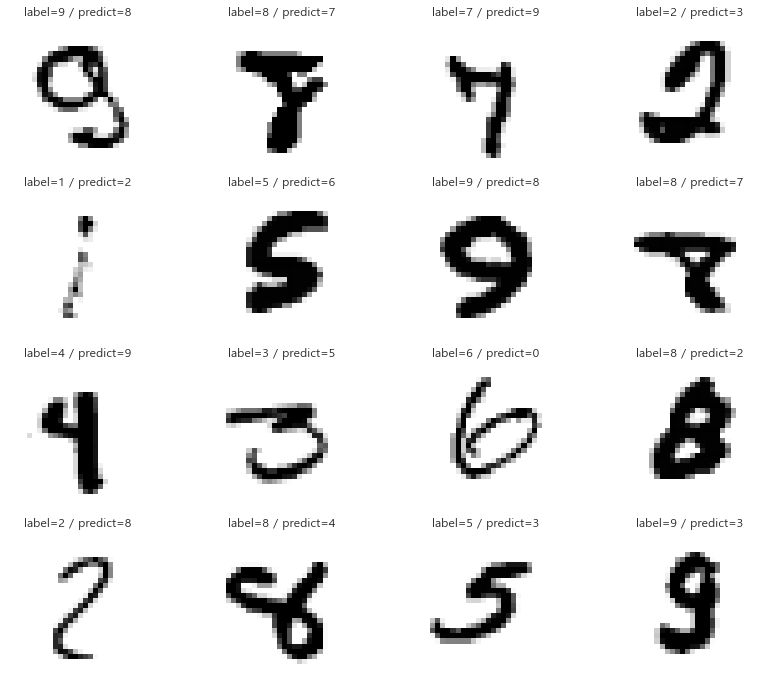

In [21]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()